In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
%matplotlib inline

In [2]:
dframe = pd.read_csv("../input/cars_dataset.csv")

In [3]:
dframe.head()

,Unnamed: 0,price,year,make,model,mileage,region
0,0,21599,2012,Acura,TSX,16000,"Columbia, SC"
1,1,14599,2013,Dodge,Dart SE,18000,"Los Angeles, CA"
2,2,33998,2014,Toyota,FJ Cruiser,18000,"Houston, TX"
3,3,19599,2014,Toyota,Camry SE,5000,"Tinley Park, IL"
4,4,14998,2009,Honda,Accord EX-L,56000,"Hillside, IL"


In [4]:
dframe.columns

Index(['Unnamed: 0', 'price', 'year', 'make', 'model', 'mileage', 'region'], dtype='object')

In [5]:
dframe.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
dframe.head()

,price,year,make,model,mileage,region
0,21599,2012,Acura,TSX,16000,"Columbia, SC"
1,14599,2013,Dodge,Dart SE,18000,"Los Angeles, CA"
2,33998,2014,Toyota,FJ Cruiser,18000,"Houston, TX"
3,19599,2014,Toyota,Camry SE,5000,"Tinley Park, IL"
4,14998,2009,Honda,Accord EX-L,56000,"Hillside, IL"


[]

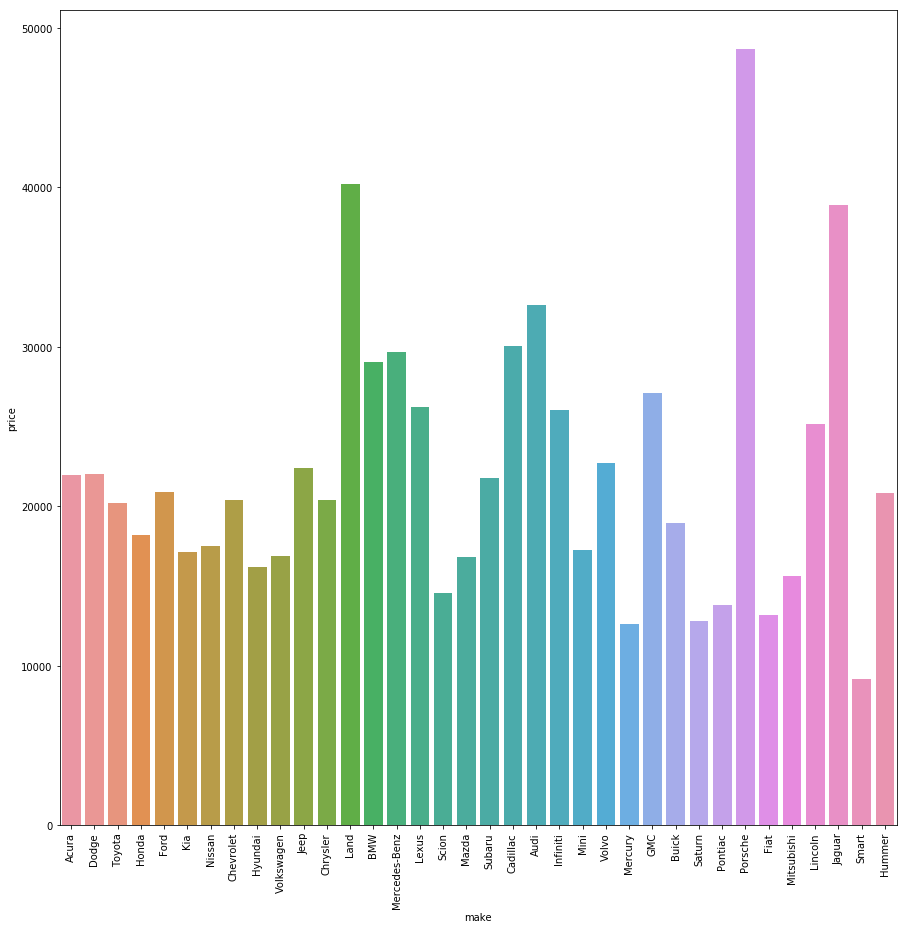

In [7]:
fig, ax = plt.subplots(figsize=(15,15))
g=sns.barplot(x="make", y="price", data=dframe, ci=None, ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.plot()

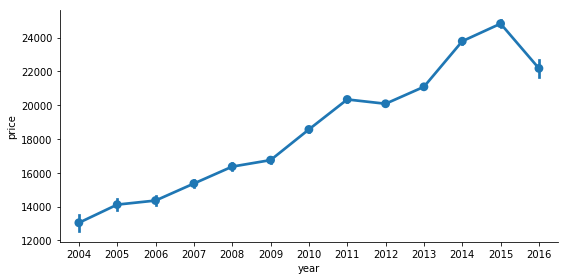

In [8]:
sns.factorplot(x="year", y="price", data=dframe, size=4, aspect=2)

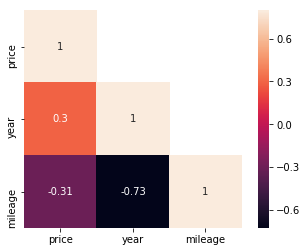

In [9]:
corrMatt = dframe.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [10]:
dframe.isnull().any()

price      False
year       False
make       False
model      False
mileage    False
region     False
dtype: bool

In [11]:
records_x = dframe.drop('price', axis=1).to_dict('records')
records_y = dframe.price.tolist()

In [12]:
x_train, x_test, y_train, y_test = train_test_split(records_x, records_y, test_size=0.3, random_state=0)

In [13]:
vectorizer = FeatureHasher()
vectorizer.fit(x_train)

FeatureHasher(alternate_sign=True, dtype=<class 'numpy.float64'>,
       input_type='dict', n_features=1048576, non_negative=False)

In [14]:
records_x_trans = vectorizer.transform(x_train)

In [16]:
regressor = DecisionTreeRegressor()
regressor.fit(records_x_trans, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [17]:
regressor.score(vectorizer.transform(x_test), y_test)

0.95470717448888975

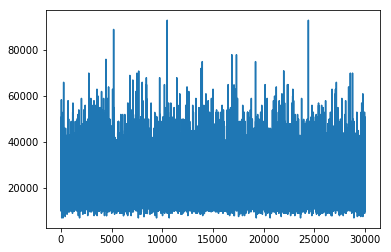

In [18]:
plt.plot(range(len(y_test)), y_test)

In [20]:
y_pred=regressor.predict(vectorizer.transform(x_test))
y_true=y_test

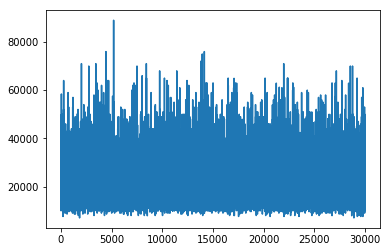

In [21]:
plt.plot(range(len(y_pred)), y_pred)

In [22]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_pred, y_true))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_pred, y_true))

Mean squared error: 2906178.57
Variance score: 0.95
